## Introduction
-----
You (an electrical engineer) wish to **determine the resistance** of an electrical component by using **Ohm's law**. You remember from your high school circuit classes that $$V = RI$$ where $V$ is the voltage in volts, $R$ is resistance in ohms, and $I$ is electrical current in amperes. Using a multimeter, you collect the following data:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

The goal is to 
1. Fit a line through the origin (i.e., determine the parameter $R$ **(resistance)** for $y = Rx$) to this data by using the **method of least squares**. You may assume that all measurements are of equal importance (relates to ordinary least squares method). 
2. Consider what the best **estimate of the resistance** is, in Ohms, for this component.

## Data preparation
----

First we will import the neccesary Python modules and load the current and voltage measurements into numpy arrays:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Store the voltage (V) and current (I) data as column vectors.
I = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).T
V = np.array([1.23, 1.38, 2.06, 2.47, 3.17]).T

x_label = 'Current (A)'
y_label = 'Voltage (V)'
data = {x_label: I, y_label: V}

dataframe_dots = pd.DataFrame(data, columns=[x_label, y_label])
dataframe_dots

,Current (A),Voltage (V)
0,0.2,1.23
1,0.3,1.38
2,0.4,2.06
3,0.5,2.47
4,0.6,3.17


Now the measurements are plotted - there's a clear to a human eye **linear relationship**

## Visualization

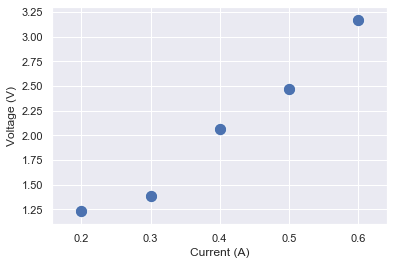

In [2]:
sns.scatterplot(x=x_label, 
                y=y_label,
                s=150,
                data=dataframe_dots)
plt.show()

## Estimating the Slope Parameter
----
Let's estimate the slope parameter $R$ (the resistance) using the least squares formulation.

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

If we know that we're looking for the slope parameter $R$, how do we define the matrix $\mathbf{H}$ and vector $\mathbf{y}$?

In [3]:
# Define the H matrix, called Jacobian, what does it contain?
H = np.mat([1, 1, 1, 1, 1]).T
y = np.divide(np.asmatrix(V).T, np.asmatrix(I).T)
print("\nResistance computed based on measuresments of voltage (V) and current (I)")
print(y)

# Estimation of the resistance parameter
R = (H.T * H).I * H.T * y

print('\nThe slope parameter R (resistance) for the best-fit line is:')
print(R)


Resistance computed based on measuresments of voltage (V) and current (I)
[[6.15      ]
 [4.6       ]
 [5.15      ]
 [4.94      ]
 [5.28333333]]

The slope parameter R (resistance) for the best-fit line is:
[[5.22466667]]


## Plotting the Results
----
Having calculated the estimated value of a slope (estimated real resistance R for y=Rx) this will allow to buil an estimated linear relationship:

In [4]:
I_line = np.arange(0, 0.8, 0.1)
V_line = (R*I_line).T

x_label = 'Current (A)'
y_label = 'Voltage (V)'

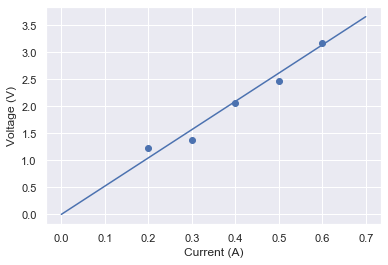

In [5]:
plt.scatter(I, V)
plt.plot(I_line, V_line)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

plt.show()

The slope parameter $\hat{R}$ should is to the actual resistance value of $R = 5~\Omega$. However, the estimated value will not match the true resistance value exactly, since there's a limited number of noisy measurements.